Purpose: Run PCA for B73 heat & salt stress (and control) samples downloaded on Friday, March 24th and processed the following week (fastp, salmon, tximport).<br>
Author: Anna Pardo<br>
Date initiated: March 29, 2023

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [2]:
# load TPM 
tpm = pd.read_csv("TPM_LS_B73HS_29-Mar-2023.txt",sep="\t",header="infer",index_col="GeneID")
tpm.head()

,SRR8857768,SRR15241296,SRR8857796,SRR8857829,SRR15241111,SRR15241113,SRR15241107,SRR8857767,SRR8857846,SRR9282929,...,SRR15241112,SRR8857748,SRR8857746,SRR8857859,SRR8857826,SRR15241116,SRR9282924,SRR8857762,SRR8857800,SRR8857793
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,7.929609,14.374362,4.533406,2.679986,12.930540,13.350265,17.563087,10.019194,18.943556,1.183205,...,13.458484,20.385679,30.911501,16.355903,19.079412,13.688301,0.985817,10.144085,8.660952,1.304263
Zm00001eb000020,2.755122,0.690184,97.100654,18.501882,0.466793,0.809933,1.070556,1.986773,64.659033,41.362878,...,0.583814,0.520334,0.880584,5.136811,1.348503,0.514654,39.494593,15.064662,117.490940,35.720474
Zm00001eb000050,0.415005,0.232174,0.205253,0.407405,0.000000,0.237701,0.106046,0.403031,1.503542,0.000000,...,0.000000,0.875410,5.188335,9.079536,5.594283,0.719160,0.000000,0.634463,0.268514,0.108968
Zm00001eb000060,14.546392,21.287446,14.600756,22.341765,41.095343,32.689909,27.343733,20.273649,60.384206,3.465902,...,42.207291,10.002839,32.654213,19.672326,43.778757,28.249017,2.274337,7.130259,14.157844,7.746759
Zm00001eb000070,0.101785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.272647,0.000000,0.000000,0.000000,0.000000,0.360537


In [3]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [4]:
# transpose TPM data
ttpm = tpm.transpose()
ttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857768,7.929609,2.755122,0.415005,14.546392,0.101785,8.089641,0.047452,0.0,2.087722,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.778309,0.000000,0.0,0.0
SRR15241296,14.374362,0.690184,0.232174,21.287446,0.000000,7.493514,0.000000,0.0,0.138261,0.0,...,0.0,0.0,0.0,0.0,0.165781,0.0,0.281818,0.648065,0.0,0.0
SRR8857796,4.533406,97.100654,0.205253,14.600756,0.000000,20.313494,0.146909,0.0,0.195187,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.111610,0.526876,0.0,0.0
SRR8857829,2.679986,18.501882,0.407405,22.341765,0.000000,16.896919,0.425738,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.283124,1.553938,0.0,0.0
SRR15241111,12.930540,0.466793,0.000000,41.095343,0.000000,15.358161,0.000000,0.0,1.212665,0.0,...,0.0,0.0,0.0,0.0,0.298568,0.0,0.727663,0.000000,0.0,0.0


In [5]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857768,7.929609,2.755122,0.415005,14.546392,0.101785,8.089641,0.047452,0.0,2.087722,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.778309,0.000000,0.0,0.0
SRR15241296,14.374362,0.690184,0.232174,21.287446,0.000000,7.493514,0.000000,0.0,0.138261,0.0,...,0.0,0.0,0.0,0.0,0.165781,0.0,0.281818,0.648065,0.0,0.0
SRR8857796,4.533406,97.100654,0.205253,14.600756,0.000000,20.313494,0.146909,0.0,0.195187,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.111610,0.526876,0.0,0.0
SRR8857829,2.679986,18.501882,0.407405,22.341765,0.000000,16.896919,0.425738,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.283124,1.553938,0.0,0.0
SRR15241111,12.930540,0.466793,0.000000,41.095343,0.000000,15.358161,0.000000,0.0,1.212665,0.0,...,0.0,0.0,0.0,0.0,0.298568,0.0,0.727663,0.000000,0.0,0.0


In [6]:
len(ttpm.columns)

39092

In [7]:
len(vttpm.columns)

38230

Variance thresholding removed 862 genes.

In [8]:
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857768,3.158597,1.908860,0.500807,3.958508,0.139843,3.184223,0.066884,0.0,1.626543,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.830506,0.000000,0.0,0.0
SRR15241296,3.942455,0.757180,0.301206,4.478159,0.000000,3.086362,0.000000,0.0,0.186831,0.0,...,0.0,0.0,0.0,0.0,0.221297,0.0,0.358191,0.720773,0.0,0.0
SRR8857796,2.468168,6.616191,0.269336,3.963544,0.000000,4.413695,0.197751,0.0,0.257236,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.152651,0.610583,0.0,0.0
SRR8857829,1.879700,4.285541,0.493038,4.544842,0.000000,4.161639,0.511709,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.191009,1.352724,0.0,0.0
SRR15241111,3.800179,0.552665,0.000000,5.395589,0.000000,4.031939,0.000000,0.0,1.145785,0.0,...,0.0,0.0,0.0,0.0,0.376922,0.0,0.788822,0.000000,0.0,0.0


In [9]:
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [10]:
real_PCs_df

,PC1,PC2
0,-75.229799,-36.241947
1,-56.679518,-164.139260
2,-127.566037,150.238743
3,-110.998749,185.482177
4,-43.033178,-165.763036
...,...,...
121,-49.860102,-170.999304
122,431.748650,32.829052
123,-116.547163,27.516310
124,-137.089798,159.172033


In [11]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.44429251, 0.21610074])

In [12]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.head()

GeneID,index,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857768,3.158597,1.908860,0.500807,3.958508,0.139843,3.184223,0.066884,0.0,1.626543,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.830506,0.000000,0.0,0.0
1,SRR15241296,3.942455,0.757180,0.301206,4.478159,0.000000,3.086362,0.000000,0.0,0.186831,...,0.0,0.0,0.0,0.0,0.221297,0.0,0.358191,0.720773,0.0,0.0
2,SRR8857796,2.468168,6.616191,0.269336,3.963544,0.000000,4.413695,0.197751,0.0,0.257236,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.152651,0.610583,0.0,0.0
3,SRR8857829,1.879700,4.285541,0.493038,4.544842,0.000000,4.161639,0.511709,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.191009,1.352724,0.0,0.0
4,SRR15241111,3.800179,0.552665,0.000000,5.395589,0.000000,4.031939,0.000000,0.0,1.145785,...,0.0,0.0,0.0,0.0,0.376922,0.0,0.788822,0.000000,0.0,0.0


In [13]:
# load metadata
md = pd.read_csv("srr_numbers_with_metadata_27-Mar-2023.tsv",sep="\t",header="infer")
md.head()

,BioProject,SRA_number,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue,Photoperiod,Temp. (C; day/night),Relative humidity (%),Light (umol/m2/s),Location,Growth Env.,Media
0,PRJNA378714,SRR5344453,control_3d_rep1,1.0,B73,Illumina HiSeq 2000,PAIRED,Control,3 days,NaN,V3,Shoot,18/6h,25 +/- 2,NaN,NaN,"CAU National Maize Improvement Center, China",Greenhouse,NaN
1,PRJNA378714,SRR5344560,control_3d_rep2,2.0,B73,Illumina HiSeq 2000,PAIRED,Control,3 days,NaN,V3,Shoot,18/6h,25 +/- 2,NaN,NaN,"CAU National Maize Improvement Center, China",Greenhouse,NaN
2,PRJNA378714,SRR5344568,control_3d_rep2,3.0,B73,Illumina HiSeq 2000,PAIRED,Control,3 days,NaN,V3,Shoot,18/6h,25 +/- 2,NaN,NaN,"CAU National Maize Improvement Center, China",Greenhouse,NaN
3,PRJNA378714,SRR5344570,drought_3d_rep1,1.0,B73,Illumina HiSeq 2000,PAIRED,Drought,3 days,NaN,V3,Shoot,18/6h,25 +/- 2,NaN,NaN,"CAU National Maize Improvement Center, China",Greenhouse,NaN
4,PRJNA378714,SRR5344571,drought_3d_rep1,3.0,B73,Illumina HiSeq 2000,PAIRED,Drought,3 days,NaN,V3,Shoot,18/6h,25 +/- 2,NaN,NaN,"CAU National Maize Improvement Center, China",Greenhouse,NaN


In [14]:
# in vttpm_log, rename column "index" to "SRA_number"
vttpm_log.rename(columns={"index":"SRA_number"},inplace=True)
vttpm_log.head()

GeneID,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857768,3.158597,1.908860,0.500807,3.958508,0.139843,3.184223,0.066884,0.0,1.626543,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.830506,0.000000,0.0,0.0
1,SRR15241296,3.942455,0.757180,0.301206,4.478159,0.000000,3.086362,0.000000,0.0,0.186831,...,0.0,0.0,0.0,0.0,0.221297,0.0,0.358191,0.720773,0.0,0.0
2,SRR8857796,2.468168,6.616191,0.269336,3.963544,0.000000,4.413695,0.197751,0.0,0.257236,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.152651,0.610583,0.0,0.0
3,SRR8857829,1.879700,4.285541,0.493038,4.544842,0.000000,4.161639,0.511709,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.191009,1.352724,0.0,0.0
4,SRR15241111,3.800179,0.552665,0.000000,5.395589,0.000000,4.031939,0.000000,0.0,1.145785,...,0.0,0.0,0.0,0.0,0.376922,0.0,0.788822,0.000000,0.0,0.0


In [15]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
vttpm_log_merged = vttpm_log.merge(md,how="inner")
vttpm_log_merged.head()

,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Concentration,Developmental Stage,Tissue,Photoperiod,Temp. (C; day/night),Relative humidity (%),Light (umol/m2/s),Location,Growth Env.,Media
0,SRR8857768,3.158597,1.908860,0.500807,3.958508,0.139843,3.184223,0.066884,0.0,1.626543,...,NaN,V3,Leaf,14/10h,38C,65,NaN,NaN,Phytotron,NaN
1,SRR15241296,3.942455,0.757180,0.301206,4.478159,0.000000,3.086362,0.000000,0.0,0.186831,...,NaN,V2/V3,Leaf,16/8h,30/20C,NaN,NaN,NaN,NaN,NaN
2,SRR8857796,2.468168,6.616191,0.269336,3.963544,0.000000,4.413695,0.197751,0.0,0.257236,...,NaN,V3,Stalk,14/10h,25C,65,NaN,NaN,Phytotron,NaN
3,SRR8857829,1.879700,4.285541,0.493038,4.544842,0.000000,4.161639,0.511709,0.0,0.000000,...,NaN,V3,Root,14/10h,38C,65,NaN,NaN,Phytotron,NaN
4,SRR15241111,3.800179,0.552665,0.000000,5.395589,0.000000,4.031939,0.000000,0.0,1.145785,...,NaN,V2/V3,Leaf,16/8h,30/20C,NaN,NaN,NaN,NaN,NaN


In [16]:
for i in list(vttpm_log_merged.columns):
    if not i.startswith("Zm"):
        print(i)

SRA_number
BioProject
sample_name
Replicate_num
Genotype
Technology
Library_layout
Treatment
Time_after_treatment
Concentration
Developmental Stage
Tissue
Photoperiod
Temp. (C; day/night) 
Relative humidity (%)
Light (umol/m2/s)
Location
Growth Env.
Media


In [17]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental Stage","Tissue","Photoperiod","Temp. (C; day/night) ",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue,Photoperiod,Temp. (C; day/night),Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-75.229799,-36.241947,PRJNA520822,Heat,2 hours,NaN,V3,Leaf,14/10h,38C,65,NaN,Phytotron,NaN
1,-56.679518,-164.139260,PRJNA747925,Control,1 hour,NaN,V2/V3,Leaf,16/8h,30/20C,NaN,NaN,NaN,NaN
2,-127.566037,150.238743,PRJNA520822,Control,0 hour,NaN,V3,Stalk,14/10h,25C,65,NaN,Phytotron,NaN
3,-110.998749,185.482177,PRJNA520822,Heat,48 hours,NaN,V3,Root,14/10h,38C,65,NaN,Phytotron,NaN
4,-43.033178,-165.763036,PRJNA747925,Control,4 hours,NaN,V2/V3,Leaf,16/8h,30/20C,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'PCA of TPM for B73 Heat, Salt, & Control')

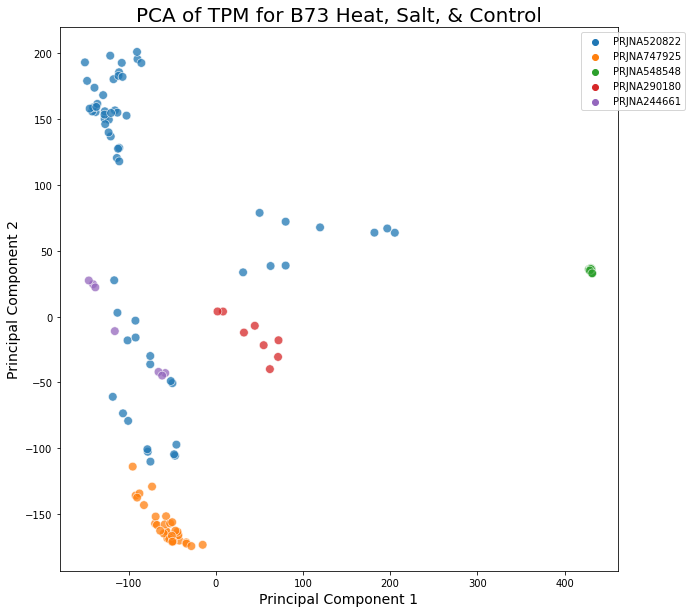

In [18]:
# make the plot
plt.figure(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],palette="tab10",s=75,alpha=0.75)
plt.legend(bbox_to_anchor=(1.13,1))
plt.xlabel("Principal Component 1",fontsize=14)
plt.ylabel("Principal Component 2",fontsize=14)
plt.title("PCA of TPM for B73 Heat, Salt, & Control",fontsize=20)

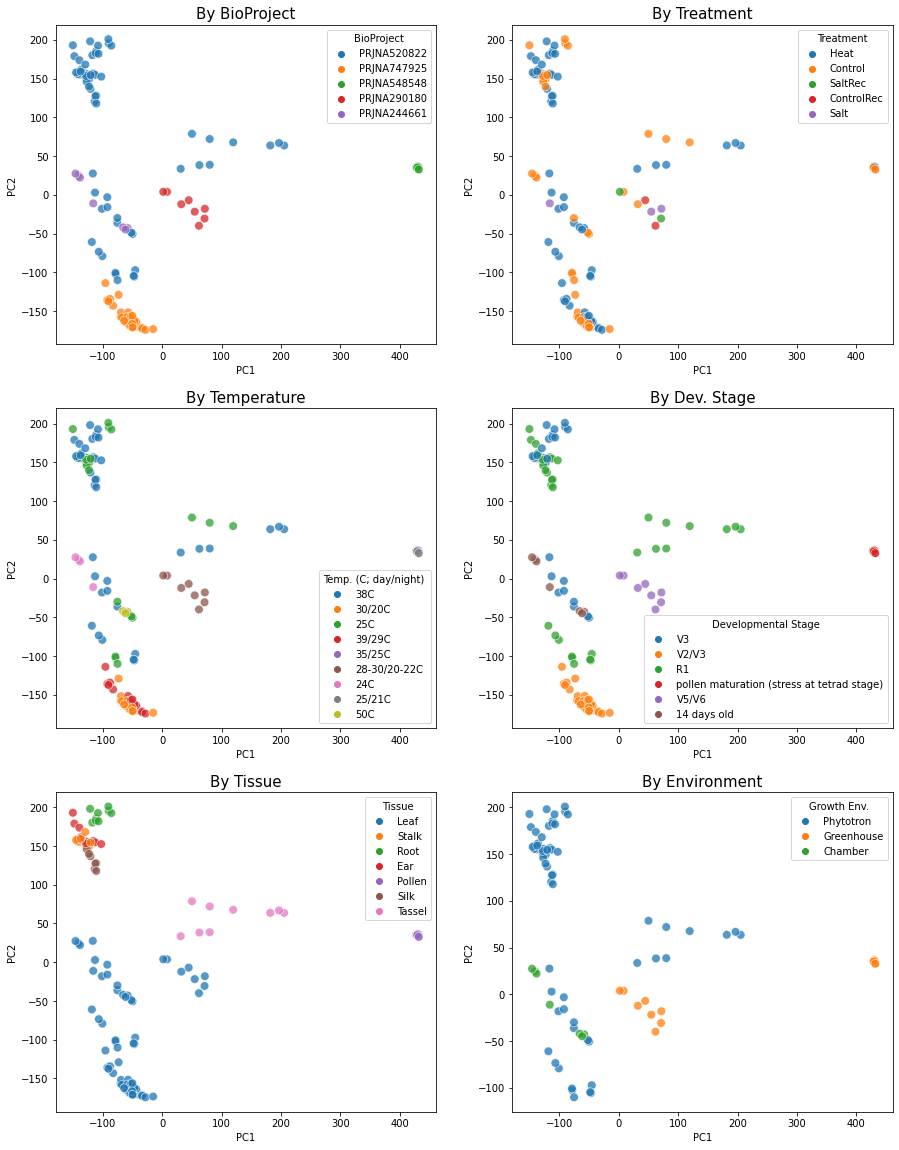

In [19]:
# make subplots & color by different things: BioProject, treatment, temperature, dev stage, growth env, tissue

fig,ax = plt.subplots(nrows=3,ncols=2,figsize = (15,20))

sns.scatterplot(ax=ax[0,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],palette="tab10",s=75,alpha=0.75).set_title("By BioProject",fontsize=15)
sns.scatterplot(ax=ax[0,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab10",s=75,alpha=0.75).set_title("By Treatment",fontsize=15)
sns.scatterplot(ax=ax[1,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Temp. (C; day/night) "],palette="tab10",s=75,alpha=0.75).set_title("By Temperature",fontsize=15)
sns.scatterplot(ax=ax[1,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Developmental Stage"],palette="tab10",s=75,alpha=0.75).set_title("By Dev. Stage",fontsize=15)
sns.scatterplot(ax=ax[2,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="tab10",s=75,alpha=0.75).set_title("By Tissue",fontsize=15)
sns.scatterplot(ax=ax[2,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="tab10",s=75,alpha=0.75).set_title("By Environment",fontsize=15)
plt.savefig("B73_HeatSaltCtrl_UncorrectedPCAs.pdf")
plt.savefig("B73_HeatSaltCtrl_UncorrectedPCAs.png")